<font face='宋体'>提前导入相关库</font>


In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

path = os.path.dirname(os.getcwd())
sys.path.append(path)

from common.filesio import FilesIO

### <font face="黑体">1.决策分类树</font>

#### <font face="黑体">a.导入数据</font>

&emsp;&emsp;<font face="宋体">导入数据，并显示数据前</font>
<font face="Times New Roman">5</font>
<font face="宋体">行数据：</font>

In [2]:
data = pd.read_csv(FilesIO.getHomeworkData("IRIS.csv"))
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### <font face="黑体">b.探索性分析 </font>

&emsp;&emsp;<font face="宋体">画出每个特征与鸢尾花类别的箱线图</font>

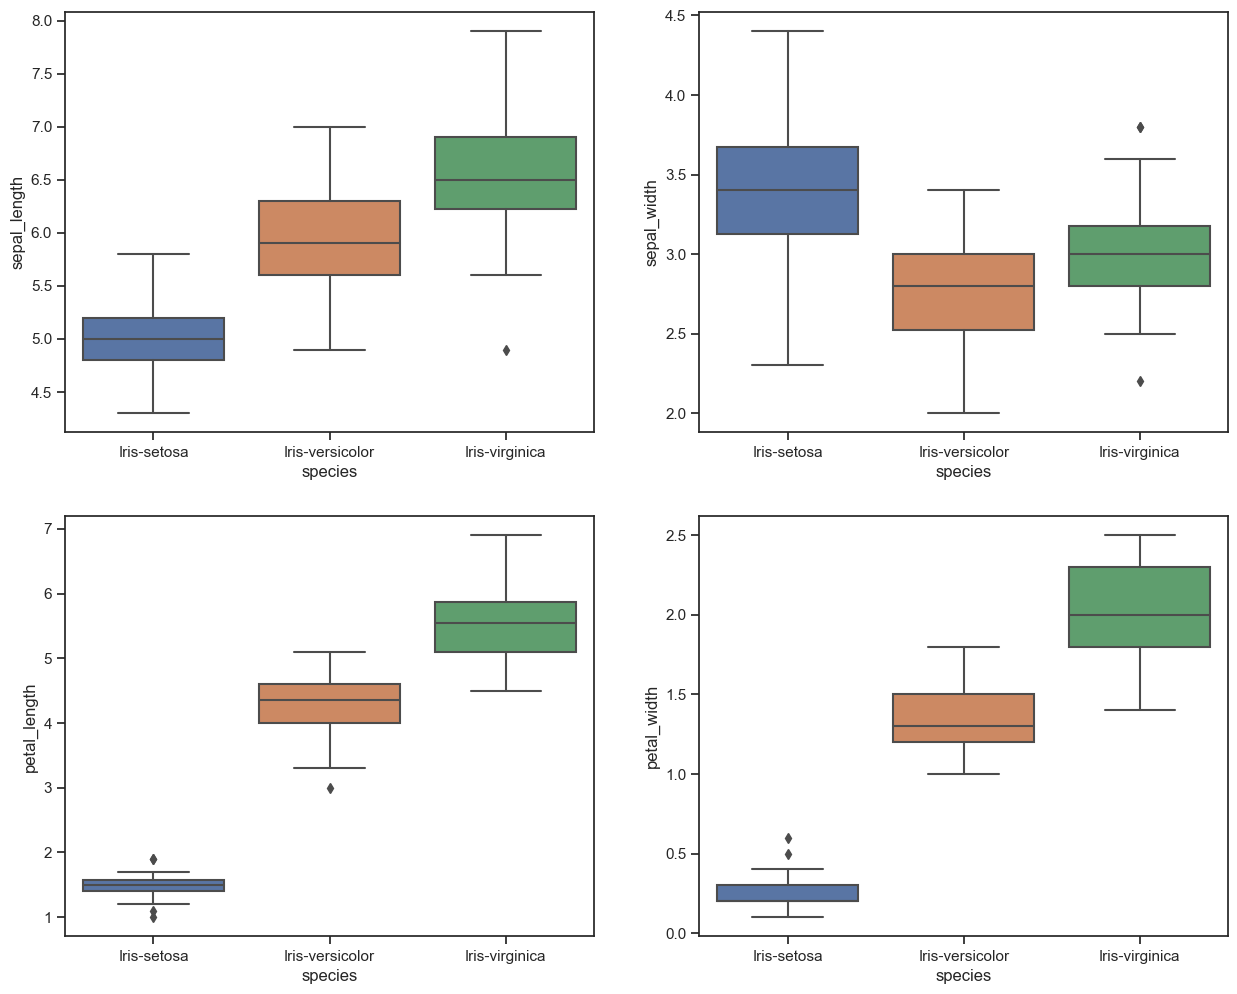

In [3]:
sns.set_theme(rc={'figure.figsize':(15,12)})
sns.set_style('ticks')
for i, feature in enumerate(data.columns[:-1]):
    plt.subplot(221+i)
    sns.boxplot(x='species', y=feature, data=data)
plt.show()

<font face="宋体">从图中可以看出，花萼长度</font>
<font face="Times New Roman">(SepalLength)</font>
<font face="宋体">和花萼宽度</font>
<font face="Times New Roman">(SepalWidth)</font>
<font face="宋体">在三种花之间的有一定的差别但是差别并不巨大。</font>

<font face="宋体">但是，花瓣长度</font>
<font face="Times New Roman">(PetalLength)</font>
<font face="宋体">和花瓣宽度</font>
<font face="Times New Roman">(PetalWidth)</font>
<font face="宋体">在三种花之间的有巨大的差别。</font>

#### <font face="黑体">c.在训练集上使用网格搜索法和寻找最优分类树 </font>

<font face="Times New Roman">(1)</font>
<font face="宋体">划分训练集测试集，并使用网格搜索法寻找</font>

In [4]:
# 划分测试集与训练集
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], 
                                                    test_size=0.3, random_state=0)

# 创建参数网格
param_grids = {
              "ccp_alpha": [0, 0.01, 0.02, 0.03, 0.05, 0.1, 0.2],
              "max_depth": [1,2,3,4],
              "min_samples_leaf": [3,5,10,20,30,50]  
              }
# 寻找最优分类树
gs_cv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grids, cv=5, scoring='accuracy')
gs_cv.fit(X_train, y_train)
for key, value in gs_cv.best_params_.items():
    print("最优的",key, ":", value)
clf_best = gs_cv.best_estimator_
clf_best

最优的 ccp_alpha : 0
最优的 max_depth : 3
最优的 min_samples_leaf : 3


DecisionTreeClassifier(ccp_alpha=0, max_depth=3, min_samples_leaf=3)

<font face="Times New Roman">(2)</font>
<font face="宋体">画出分类树</font>

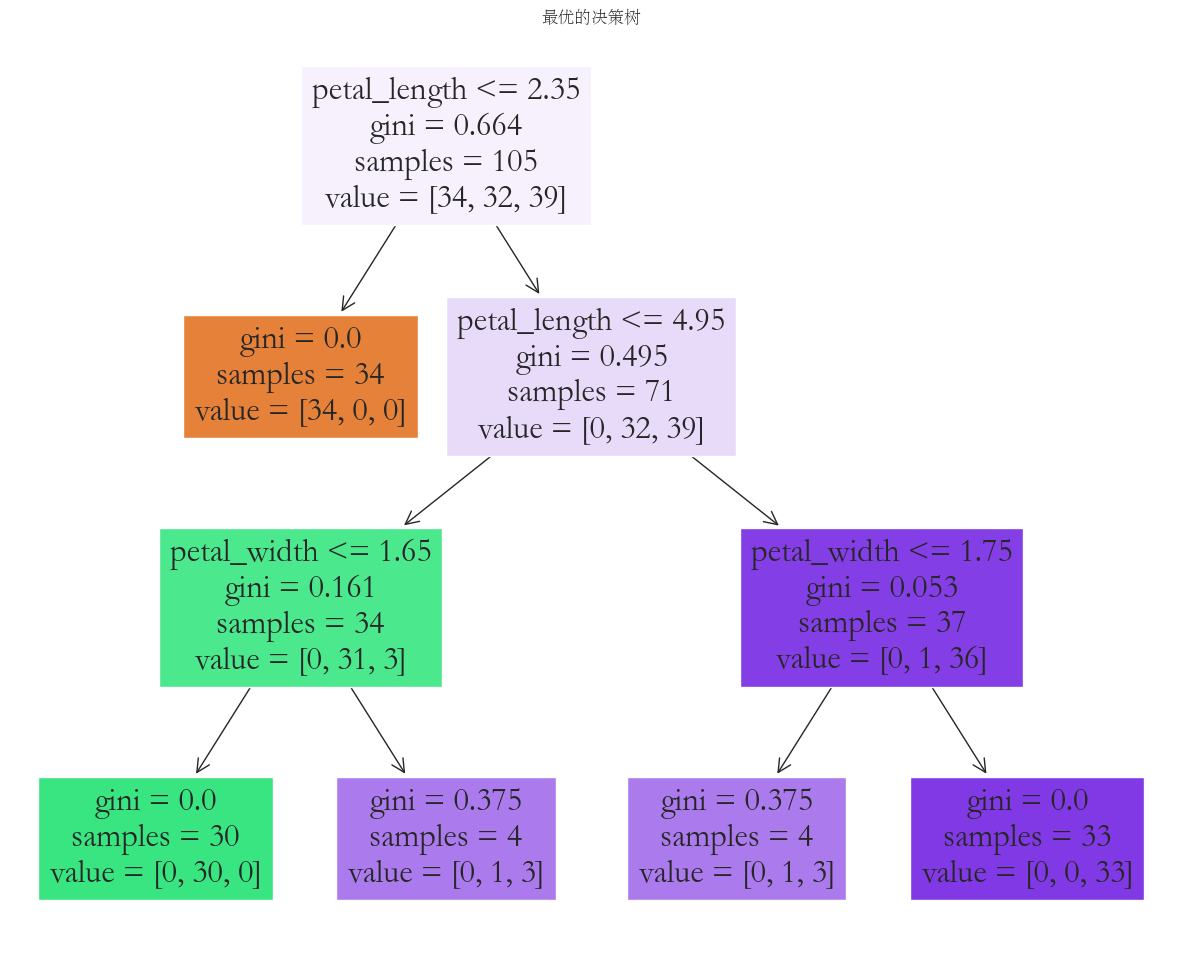

In [5]:
matplotlib.rcParams['font.sans-serif'] = ['STSong']
matplotlib.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = [15,12])
feature_name = list(X_train.columns)
plot_tree(clf_best, filled=True, feature_names = feature_name, class_names = None)
plt.title("最优的决策树")
plt.show()

<font face="Times New Roman">(3)</font>
<font face="宋体">计算特征重要性并可视化</font>

petal_length    0.933837
petal_width     0.066163
sepal_length    0.000000
sepal_width     0.000000
dtype: float64


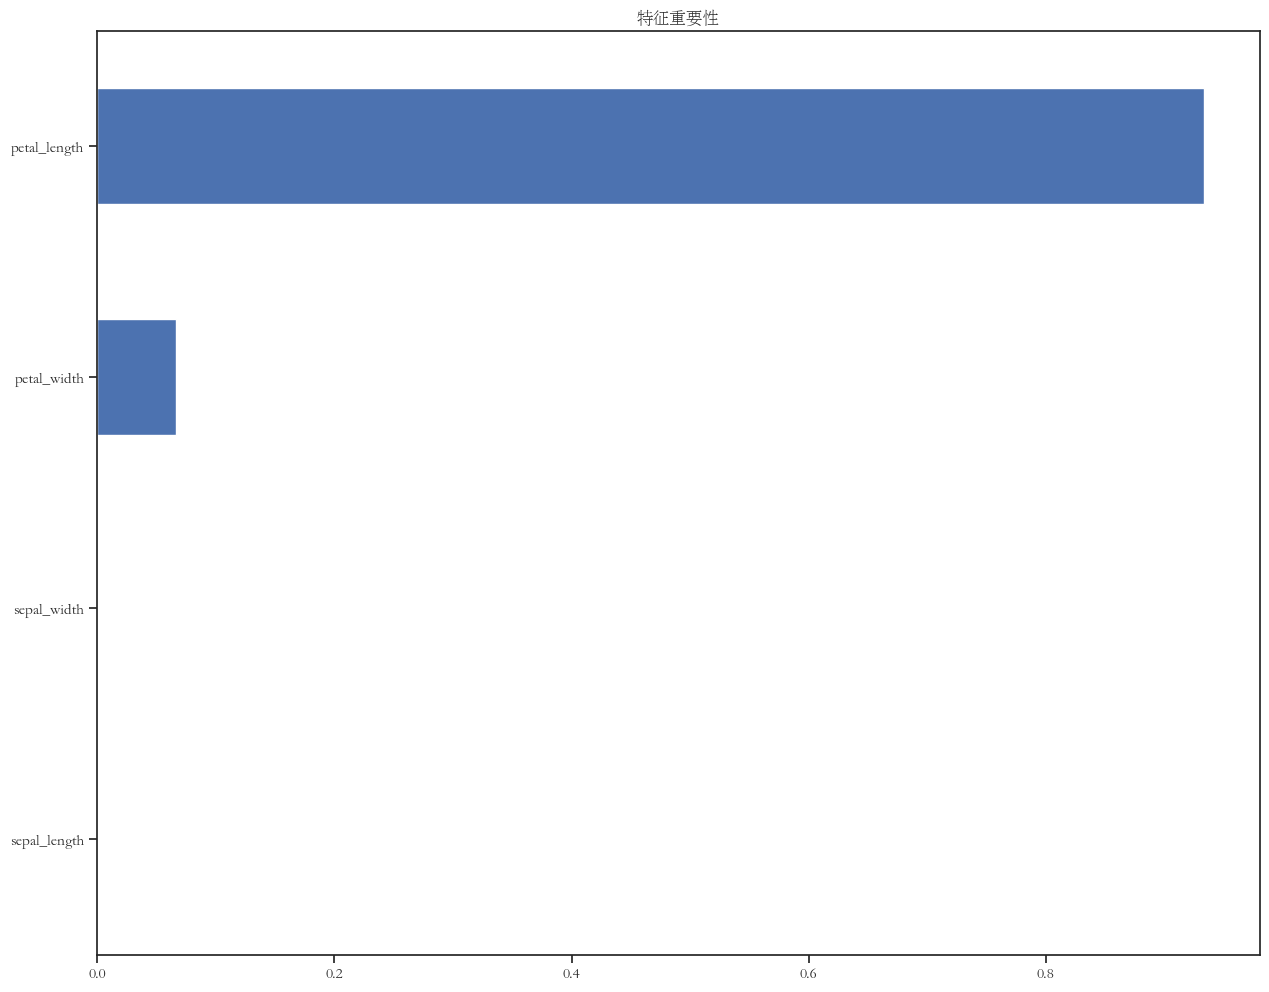

In [6]:
plt.figure(figsize = [15,12])
importances = clf_best.feature_importances_
weights = pd.Series(importances, index=feature_name)
print(weights.sort_values(ascending=False))
weights.sort_values().plot(kind = 'barh')
plt.title('特征重要性')
plt.show()

<font face="Times New Roman">(4)</font>
<font face="宋体">使用最优的分类树在测试集上做预测</font>

<font face="宋体">计算分类正确率，精确率、召回率、</font>
<font face="Times New Roman">F1</font>
<font face="宋体">值</font>

In [7]:
# 在测试集上进行预测，并计算相关指标
y_pred = clf_best.predict(X_test)
y_pred_prob = clf_best.predict_proba(X_test)

# 正确率
test_accuracy = clf_best.score(X_test, y_test)
print("Accuracy=%.3f"%test_accuracy)
# 精确率
test_precision = metrics.precision_score(y_test, y_pred, average = 'micro')
print("Precision=%.3f"%test_precision)
# 召回率
test_recall = metrics.recall_score(y_test, y_pred, average = 'micro')
print("Recall=%.3f"%test_recall)
# F1值
test_f1 = metrics.f1_score(y_test, y_pred, average = 'micro')
print("test_f1=%.3f"%test_f1)

Accuracy=0.978
Precision=0.978
Recall=0.978
test_f1=0.978


#### <font face="黑体">d.结论 </font>

<font face="宋体">从结果来看，花瓣长度和宽度对类别的影响非常大，花萼长度和宽度没有影响</font>

<font face="宋体">从决策树来看，当花瓣长度小于等于</font>
<font face="Times New Roman">2.35</font>
<font face="宋体">属于第一类别的鸢尾花，</font>
<font face="宋体">当花瓣长度大于</font>
<font face="Times New Roman">2.35</font>
<font face="宋体">，小于等于</font>
<font face="Times New Roman">4.95</font>
<font face="宋体">并且花瓣宽度小于等于</font>
<font face="Times New Roman">1.65</font>
<font face="宋体">时，属于第二类别的鸢尾花</font>
<font face="宋体">其余的情况下属于第三类别的鸢尾花</font>

### <font face="黑体">2.随机森林</font>

<font face="Times New Roman">(1)</font>
<font face="宋体">使用网格搜索法寻找</font>

In [8]:
param_grids = {
               "n_estimators": [50,100,200,300],
               "max_features": ["sqrt", "log2", None]
              }
gs_cv1 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grids, 
                      cv=5, scoring='accuracy', n_jobs=-1)
gs_cv1.fit(X_train, y_train)
for key, value in gs_cv1.best_params_.items():
    print("最优的",key, ":", value)
rf_best = gs_cv1.best_estimator_
rf_best

最优的 max_features : sqrt
最优的 n_estimators : 100


RandomForestClassifier()

<font face="Times New Roman">(2)</font>
<font face="宋体">计算特征重要性并可视化</font>

petal_length    0.457756
petal_width     0.434609
sepal_length    0.086361
sepal_width     0.021274
dtype: float64


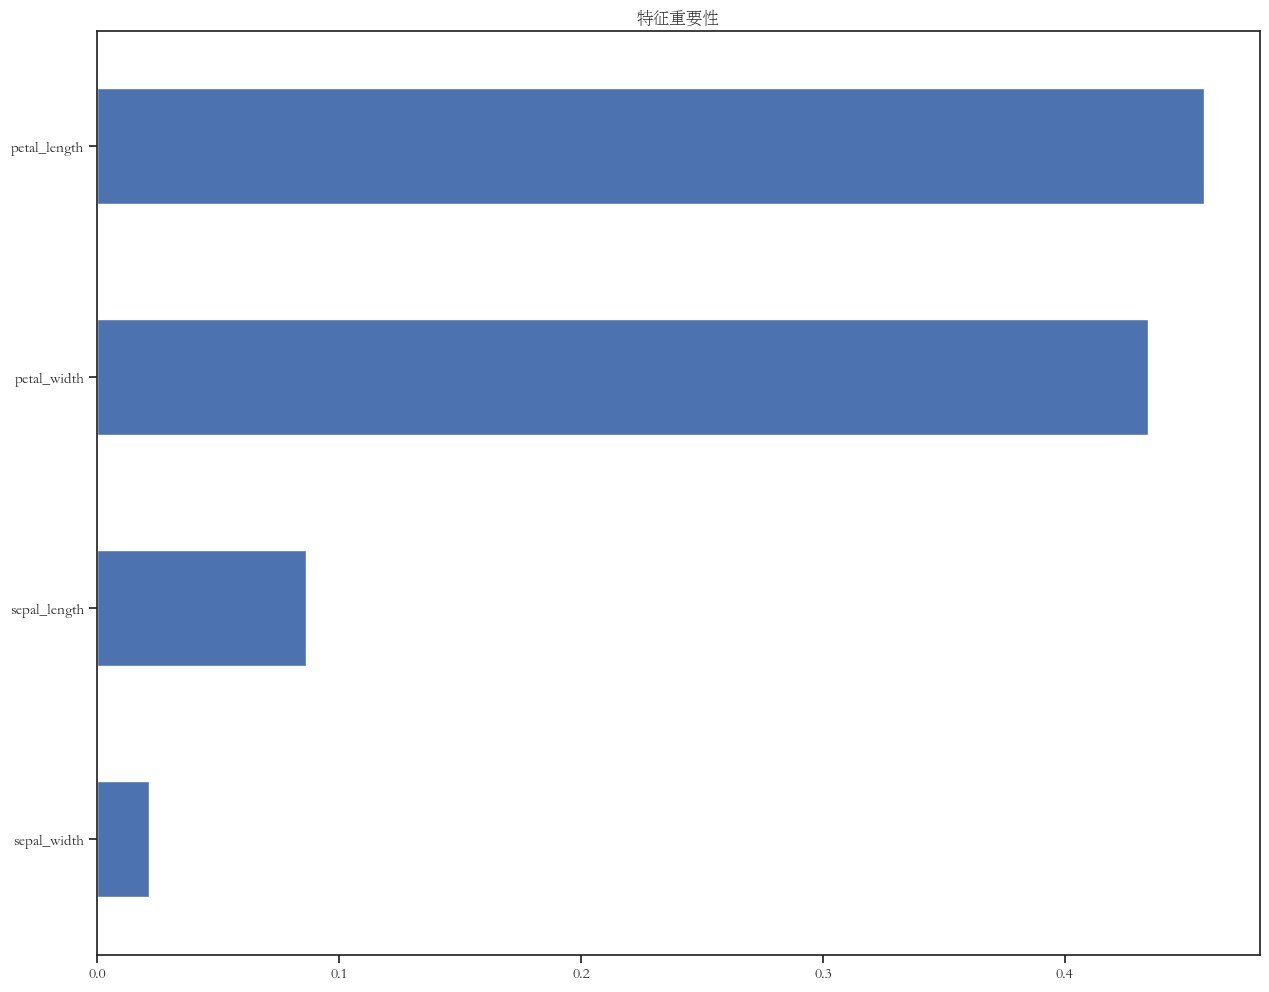

In [9]:
plt.figure(figsize = [15,12])
importances = rf_best.feature_importances_
weights = pd.Series(importances, index=feature_name)
print(weights.sort_values(ascending=False))
weights.sort_values().plot(kind = 'barh')
plt.title('特征重要性')
plt.show()

<font face="Times New Roman">(3)</font>
<font face="宋体">使用最优的随机森林在测试集上做预测</font>

<font face="宋体">计算分类正确率，精确率、召回率、</font>
<font face="Times New Roman">F1</font>
<font face="宋体">值</font>

In [10]:
y_pred = rf_best.predict(X_test)
y_pred_prob = rf_best.predict_proba(X_test)

# 正确率
test_accuracy = rf_best.score(X_test, y_test)
print("Accuracy=%.3f"%test_accuracy)
# 精确率
test_precision = metrics.precision_score(y_test, y_pred, average = 'micro')
print("Precision=%.3f"%test_precision)
# 召回率
test_recall = metrics.recall_score(y_test, y_pred, average = 'micro')
print("Recall=%.3f"%test_recall)
# F1值
test_f1 = metrics.f1_score(y_test, y_pred, average = 'micro')
print("test_f1=%.3f"%test_f1)

Accuracy=0.978
Precision=0.978
Recall=0.978
test_f1=0.978


#### <font face="黑体">d.结论 </font>

<font face="宋体">花瓣长度和宽度对类别的影响非常大，花萼长度和宽度的影响相比下很小</font>